# 手动实现梯度下降（可视化）

## 1.导数的实现

### 1.1 Scipy

-- scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)[source]

    · func：需要求导的函数，只写参数名即可，不要写括号，否则会报错
    · x0：要求导的那个点，float类型
    · dx（可选）：间距，应该是一个很小的数，float类型
    · n（可选）：n阶导数。默认值为1，int类型
    · args（可选）：参数元组
    · order（可选）：使用的点数必须是奇数，int类型

In [1]:
from scipy.misc import derivative

In [2]:
def f(x):
    return x**3 + x**2
derivative(f,1.0, dx=1e-6)

4.999999999921734

## 1.2 Sympy表达式求导

In [3]:
from math import exp
def g(x):
    return exp(x)

In [4]:
derivative(g, x0=1.0, dx=1e-6, n=2)

2.7182700534922333

In [5]:
import sympy as sy

In [6]:
# 符号化变量
x = sy.Symbol('x')

In [7]:
func = 1/(1 + x**2)

In [8]:
print("x:{}".format(type(x)))

x:<class 'sympy.core.symbol.Symbol'>


In [9]:
print(func)

1/(x**2 + 1)


In [10]:
print(sy.diff(func, x))

-2*x/(x**2 + 1)**2


In [11]:
print(sy.diff(func, x).subs(x, 3))

-3/50


In [12]:
print(sy.diff(func, x).subs(x, 3).evalf())

-0.0600000000000000


博客https://www.cnblogs.com/zyg123/ 中有更多关于Sympy的相关文章

## 2. 模拟实现梯度下降

### 2.1 封装函数

In [13]:
%matplotlib inline

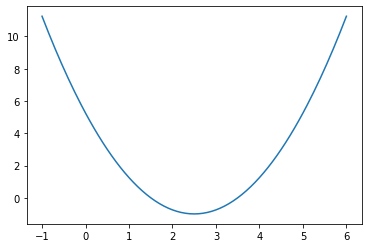

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def lossFunction(x):
    return (x-2.5)**2-1

# 在-1到6的范围内构建140个点
plot_x = np.linspace(-1, 6, 141)
# plot_y是对应的损失函数值
plot_y = lossFunction(plot_x)

plt.plot(plot_x, plot_y)
plt.show()

#### 求导方法
<p>算法：计算损失函数J在当前点的对应导数
<p>输入：当前数据点theta
<p>输出：点在损失函数上的导数


In [15]:
def dLF(theta):
    return derivative(lossFunction, theta, dx=1e-6)

In [16]:
theta= 0.0
eta = 0.1
epsilon = 1e-6
while True:
    # 每一轮循环后，要求当前这个点的梯度是多少
    gradient = dLF(theta)
    last_theta = theta
    # 移动点。沿梯度的反方向移动步长eta
    theta = theta - eta * gradient
    # 判断theta是否达到最小值
    # 因为梯度在不断下降，因此新theta的损失函数在不断减小
    # 看差值是否达到了要求
    if (abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
        break
print(theta)
print(lossFunction(theta))

2.498732349398569
-0.9999983930619527


In [17]:
def gradient_descent(initial_theta, eta, epsilon=1e-6):
    theta = initial_theta
    theta_history.append(theta)
    while 1:
        # 每一轮循环后，要求当前这个点的梯度是多少
        gradient = dLF(theta)
        last_theta = theta
        # 移动点，沿梯度的反方向移动步长eta
        theta = theta - eta*gradient
        theta_history.append(theta)
        # 判断theta是否达到最小值
        if (abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
            break

In [18]:
def plot_theta_history():
    plt.plot(plot_x,plot_y)
    plt.plot(np.array(theta_history), lossFunction(np.array(theta_history)), color='red', marker='o')
    plt.show()

### 2.2 调整学习率

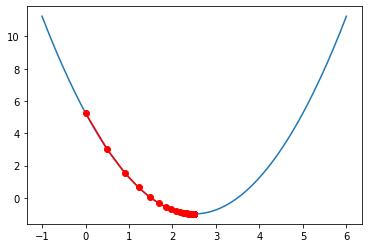

梯度下降查找次数： 35


In [19]:
eta=0.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

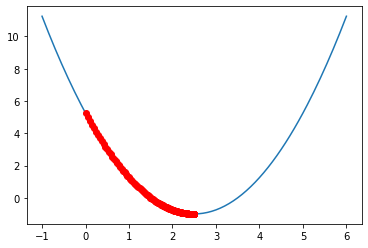

梯度下降查找次数： 310


In [20]:
eta=0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

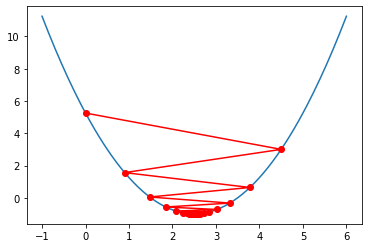

梯度下降查找次数： 35


In [21]:
eta=0.9
theta_history = []
gradient_descent(0., eta)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

#### 避免死循环

In [22]:
def lossFunction(x):
    try:
        return (x-2.5)**2-1
    except:
        return float('inf')

In [23]:
def gradient_descent(initial_theta, eta, n_iters, epsilon=1e-6):
    theta = initial_theta
    theta_history.append(theta)
    i_iters = 0
    while i_iters < n_iters: # n_iters最大循环次数
        gradient = dLF(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if(abs(lossFunction(theta) - lossFunction(last_theta)) < epsilon):
            break
        i_iters += 1

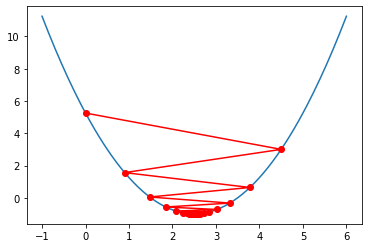

梯度下降查找次数： 35


In [24]:
eta=0.9
theta_history = []
gradient_descent(0., eta, 600)
plot_theta_history()
print("梯度下降查找次数：",len(theta_history))

0xFF 总结
梯度是向量，求梯度就要求导数。在python中，除了自己手动计算以外，还有两个常用的求导方法：Scipy & Sympy。

在求出导数之后就可以模拟梯度下降的过程编写代码了，这里面还要注意退出循环的条件。当学习率过小，收敛学习速度变慢，使得算法的效率降低；学习率过大又会导致不收敛，在“错误的道路上”越走越远。我们要对异常进行进行处理。

这样，我们就手动实现了梯度下降算法。

# 精彩！

# 线性回归中的梯度下降

### 梯度下降代码

In [25]:
def fit_gd(self, X_train, y_train, eta=0.01, n_iters=1e4):
    """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
    assert X_train.shape[0] == y_train.shape[0], \
        "the size of X_train must be equal to the size of y_train"

    def J(theta, X_b, y):
        try:
            return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
        except:
            return float('inf')
        
    def dJ(theta, X_b, y):
        return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

    def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

        theta = initial_theta
        cur_iter = 0

        while cur_iter < n_iters:
            gradient = dJ(theta, X_b, y)
            last_theta = theta
            theta = theta - eta * gradient
            if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                break

            cur_iter += 1

        return theta

    X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
    initial_theta = np.zeros(X_b.shape[1])
    self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

    self.intercept_ = self._theta[0]
    self.coef_ = self._theta[1:]

    return self

### 使用真实数据

In [26]:
import numpy as np
from sklearn import datasets

In [27]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [28]:
X = X[y < 50.0]
y = y[y < 50.0]

In [30]:
import sys
sys.path.append('C:\python_course\lect01\饼干Japason-机器学习小组\ML_Algorithms')

In [41]:
from LinearRegression import LinearRegression
from model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [44]:
lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 1 ms


TypeError: predict() takes 2 positional arguments but 3 were given

In [48]:
lin_reg2 = LinearRegression()
lin_reg2.fit_normal(X_train, y_train)
lin_reg2.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [50]:
lin_reg2.fit_normal(X_train, y_train)
lin_reg2.score(X_test, y_test)

TypeError: predict() takes 2 positional arguments but 3 were given

In [51]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)
lin_reg2.score(X_test, y_test)

AttributeError: 'LinearRegression' object has no attribute 'fit_gd'

In [88]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)
lin_reg3 = LinearRegression()
lin_reg3.fit_gd(X_train_std, y_train)
X_test_std = standardScaler.transform(X_test)
lin_reg2.score(X_test, y_test)

AttributeError: 'LinearRegression' object has no attribute 'fit_sgd'

ML_Algorithms的LinearRegression有问题，还需再看看

# 随机梯度下降法

In [52]:
import numpy as np
import matplotlib.pyplot as plt

m = 100000
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)

def J(theta, X_b, y):
    try:
        return np.sum((y-X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-6):
    theta = initial_theta
    cur_iter = 0
    while(cur_iter < n_iters):
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        cur_iter += 1
    return theta

In [53]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)
theta

Wall time: 436 ms


array([3.0039231 , 4.00124873])

In [54]:
# 传递的不是整个矩阵X_b，而是其中一行X_b_i;传递y其中的一个数值y_i
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2.

def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5
    t1 = 50
    # 
    def learning_rate(cur_iter):
        return t0 / (cur_iter + t1)
    theta = initial_theta

    for cur_iter in range(n_iters):
        # 随机找到一个样本（得到其索引）
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [55]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)
print(theta)

[3.04630054 4.00922204]
Wall time: 305 ms


#### 改进代码

In [78]:
def fit_sgd(self, X_train, y_train, n_iters=50, t0=5, t1=50):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters=5, t0=5, t1=50):

            def learning_rate(t):
                return t0 / (t + t1)

            theta = initial_theta
            m = len(X_b)
            for i_iter in range(n_iters):
                # 将原本的数据随机打乱，然后再按顺序取值就相当于随机取值
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes,:]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(i_iter * m + i) * gradient

            return theta
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

In [80]:
import numpy as np
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [85]:
from ML_Algorithms.LinearRegression import LinearRegression
from ML_Algorithms.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = standardScaler.transform(X_train)
X_test_std = standardScaler.transform(X_test)
lin_reg1 = LinearRegression()
lin_reg1.fit_sgd(X_train, y_train, n_iters=2)
lin_reg1.score(X_test_std, y_test)

AttributeError: 'LinearRegression' object has no attribute 'fit_sgd'

In [89]:
lin_reg1.fit_sgd(X_train, y_train, n_iters=100)
lin_reg1.score(X_test_std, y_test)

AttributeError: 'LinearRegression' object has no attribute 'fit_sgd'

### sklearn中的SGD

In [90]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()    # 默认n_iter=5
%time sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

Wall time: 6 ms


0.8111375173877431

In [92]:
sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std, y_test)

Wall time: 4.01 ms


0.8124313613765795